# Life Expectancy vs GDP: Exploratory Data Analysis and Data Visualisation

## Goals
+ To undertake initial EDA including the five-number summary
+ To highlight patterns as they develop over time
+ To visualise time series data
## Data
+ Data taken from the World Health Organization and the World Bank
+ Data is provided as 'all_data.cvs'
## Analysis
+ Research questions:
  + What is the average life expectancy at birth (LEB) and how is this distributed?
  + What is the average GDP and how is this distributed?
  + Is there a correlation between LEB and GDP?
  + Have LEB and GDP improved over time (and if so, is this true for each individual country?)
+ Visualisation will be presented based on:
  + univatiate;
  + bivariate and;
  + multivariate analysis

## Goal 1: Load data, initial EDA and five-number summary

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv("all_data.csv")
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [120]:
df = df.rename({"Life expectancy at birth (years)":"LEB"}, axis = "columns")

In [122]:
# Dataset info - any need for cleaning? Null values?
print(df.info()) # 96 entries with no null values. Data types seem appropriate for analysis.

# Countries included in the data set
print("Number of countrie included: ", df["Country"].nunique())
print("Countries included: ", df["Country"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEB      96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
Number of countrie included:  6
Countries included:  ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [133]:
# Five-number summary
print("LED Five-number summary")
# the sample minimum (smallest observation)
print("Minimum LED: ", min(df["LEB"]))
# the lower quartile or first quartile
print("Lower quartile LED: ", df["LEB"].quantile(0.25))
# the median (the middle value)
print("Median LED: ", np.median(df["LEB"]))
# the upper quartile or third quartile
print("Upper quartile LED: ", df["LEB"].quantile(0.75))
# the sample maximum (largest observation)
print("Maximum LED: ", max(df["LEB"]))

print()

print("GDP Five-number summary")
# the sample minimum (smallest observation)
print("Minimum GDP: ", min(df["GDP"]))
# the lower quartile or first quartile
print("Lower quartile GDP: ", df["GDP"].quantile(0.25))
# the median (the middle value)
print("Median GDP: ", np.median(df["GDP"]))
# the upper quartile or third quartile
print("Upper quartile GDP: ", df["GDP"].quantile(0.75))
# the sample maximum (largest observation)
print("Maximum GDP: ", max(df["GDP"]))

LED Five-number summary
Minimum LED:  44.3
Lower quartile LED:  74.475
Median LED:  76.75
Upper quartile LED:  78.9
Maximum LED:  81.0

GDP Five-number summary
Minimum GDP:  4415702800.0
Lower quartile GDP:  173301750000.0
Median GDP:  1280220000000.0
Upper quartile GDP:  4067510000000.0
Maximum GDP:  18100000000000.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


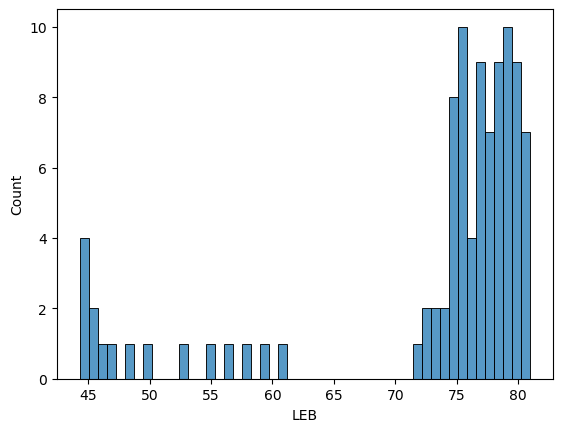

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


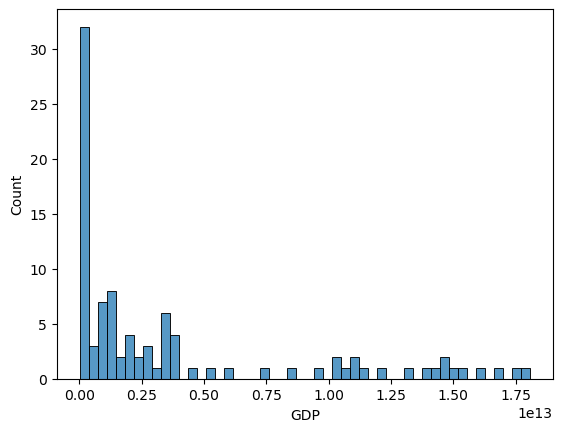

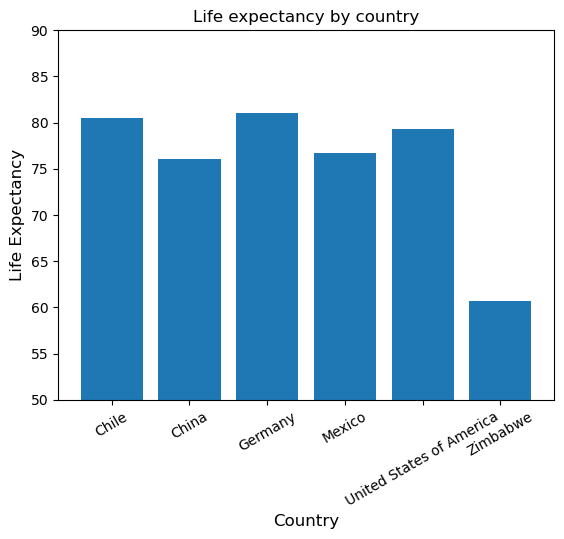

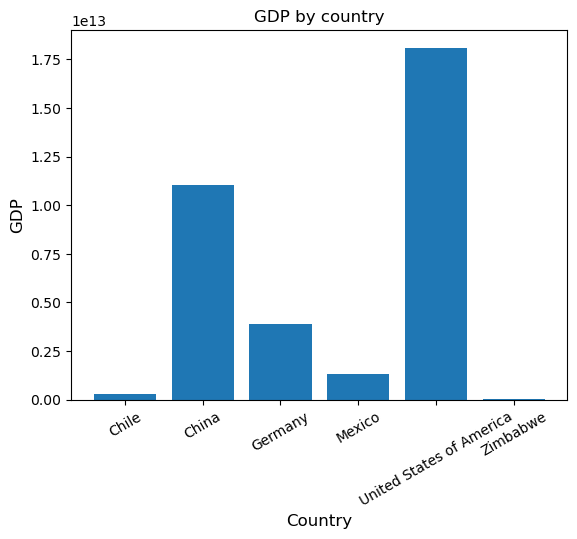

<Figure size 640x480 with 0 Axes>

In [124]:
# Distribution of life expectancy at birth (LEB)
sns.histplot(df["LEB"], bins=50)
plt.show()
plt.clf()

# Distribution of GDP
sns.histplot(df["GDP"], bins=50)
plt.show()
plt.clf()

# Life expectancy by country
plt.bar("Country", "LEB", data=df)
plt.ylim(50, 90)
plt.xticks(rotation=30)
plt.title("Life expectancy by country")
plt.xlabel("Country", fontsize=12)
plt.ylabel("Life Expectancy", fontsize=12)
plt.show()
plt.clf()

# GDP by country
plt.bar("Country", "GDP", data=df)
plt.xticks(rotation=30)
plt.title("GDP by country")
plt.xlabel("Country", fontsize=12)
plt.ylabel("GDP", fontsize=12)
plt.show()
plt.clf()

### Desisions based on EDA and five-number summary
Life expectancy data is very heavily left-skewed and GDP equally heavily right-skewed.
+ 

## Goals 2 and 3: Visualisation of patterns in the data

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

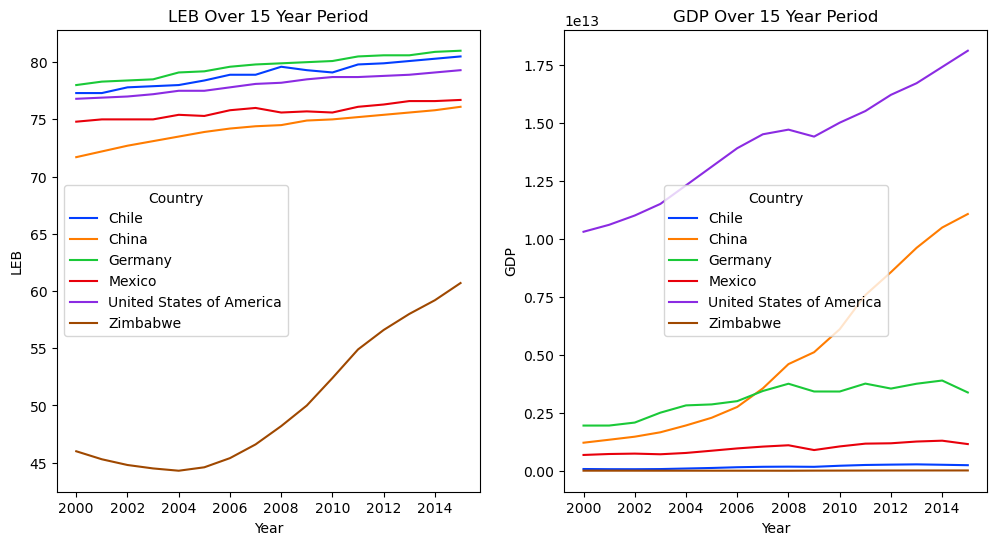

<Figure size 640x480 with 0 Axes>

In [171]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x="Year", y="LEB", hue="Country", data=df, palette="bright")
plt.legend(title="Country")
plt.title("LEB Over 15 Year Period")

plt.subplot(1, 2, 2)
sns.lineplot(x="Year", y="GDP", hue="Country", data=df, palette="bright")
plt.legend(title="Country")
plt.title("GDP Over 15 Year Period")

plt.show()
plt.clf()

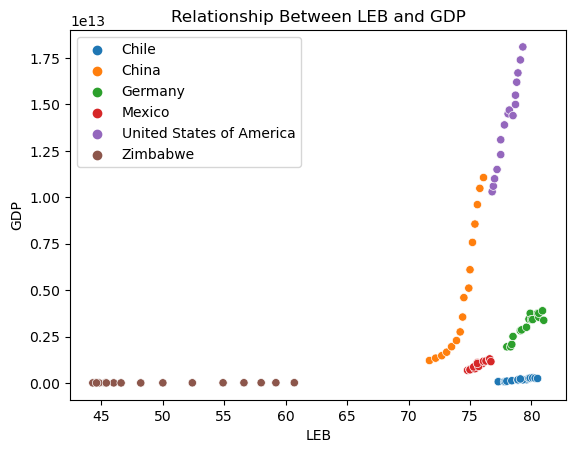

<Figure size 640x480 with 0 Axes>

In [185]:
sns.scatterplot(x=df.LEB, y=df.GDP, hue=df.Country).legend();
plt.title("Relationship Between LEB and GDP")
plt.show()
plt.clf()

## Conclusion
